<a href="https://colab.research.google.com/github/Itsvi-ctor/Cocktail-DB/blob/main/normalImages_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# # from google.colab import files
# uploaded = files.upload()

KeyboardInterrupt: 

In [3]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
from PIL import Image
import numpy as np
import os

# Folder containing images MALE TRAIN
folder_path_unhealthy = 'drive/My Drive/preprocessed_images/canny_images/Males/train'


# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_unhealthy, file) for file in os.listdir(folder_path_unhealthy) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_unhealthy = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_unhealthy = image_array_unhealthy/255.0
image_array_unhealthy.shape

(100, 600, 1200, 4)

In [5]:
# Folder containing images FEMALE TRAIN
folder_path_healthy = 'drive/My Drive/preprocessed_images/canny_images/Females/train'
# G:\My Drive\preprocessed_images\normal_image\Female_spectrogram\train

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_healthy, file) for file in os.listdir(folder_path_healthy) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_healthy = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_healthy = image_array_healthy/255.0
image_array_healthy.shape

(100, 600, 1200, 4)

In [8]:
# Folder containing images MALE TEST
folder_path_unhealthy_test = 'drive/My Drive/preprocessed_images/canny_images/Males/test'

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_unhealthy_test, file) for file in os.listdir(folder_path_unhealthy_test) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_unhealthy_test = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_unhealthy_test.shape

(50, 600, 1200, 4)

In [9]:
# Folder containing images FEMALE TEST
folder_path_healthy_test = 'drive/My Drive/preprocessed_images/canny_images/Females/test'

# List all image files in the folder
image_files_healthy_test = [os.path.join(folder_path_healthy_test, file) for file in os.listdir(folder_path_healthy_test) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_healthy_test = np.array([np.array(Image.open(file)) for file in image_files_healthy_test])
image_array_healthy_test.shape

(50, 600, 1200, 4)

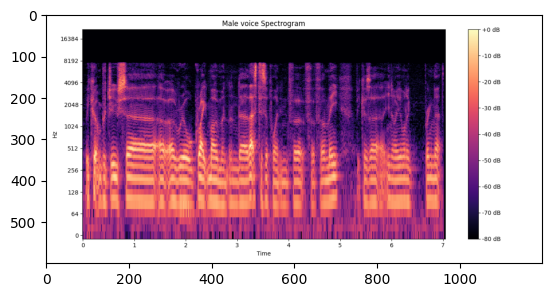

In [10]:
idx = random.randint(0, len(image_array_unhealthy_test))
plt.imshow(image_array_unhealthy_test[idx, :])
plt.show()

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (600, 1200, 4)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (600, 1200, 4)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Assuming you have a model created
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(600, 1200, 4)))
# Add other layers...

# Output layer for binary classification
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # One unit for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# Assuming image_array_healthy and image_array_unhealthy are correctly prepared and loaded

# Convert to float32 and reshape the input data
image_array_healthy = np.asarray(image_array_healthy).astype('float32').reshape((-1, 600, 1200, 4))
image_array_unhealthy = np.asarray(image_array_unhealthy).astype('float32').reshape((-1, 600, 1200, 4))

# Assuming labels are encoded (0 for unhealthy, 1 for healthy)
# Ensure labels are shaped accordingly
labels_healthy = np.ones((len(image_array_healthy), 1))  # Assuming healthy is labeled as 1
labels_unhealthy = np.zeros((len(image_array_unhealthy), 1))  # Assuming unhealthy is labeled as 0

# Combine labels for both healthy and unhealthy data
labels_combined = np.vstack((labels_unhealthy, labels_healthy))

# Train the model
model.fit(np.vstack((image_array_unhealthy, image_array_healthy)), labels_combined, epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(np.vstack((image_array_unhealthy, image_array_healthy)), labels_combined, verbose=2)
print('Loss:', loss)
print('Accuracy:', accuracy)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.5114 - loss: 306.4207
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - accuracy: 0.5827 - loss: 193.4492
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - accuracy: 0.6030 - loss: 65.6744
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.6416 - loss: 19.3334
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.5488 - loss: 24.4957
7/7 - 12s - 2s/step - accuracy: 0.6600 - loss: 9.9198
Loss: 9.919780731201172
Accuracy: 0.6600000262260437


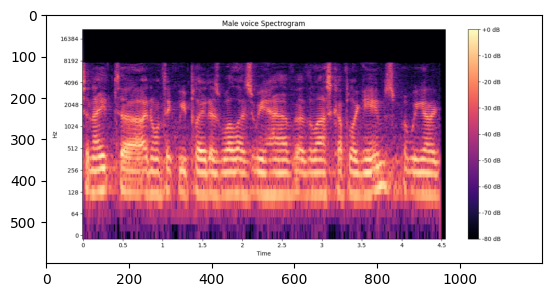

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Our model says it is : Male


In [15]:
idx2 = random.randint(0, len(image_array_healthy_test))
plt.imshow(image_array_unhealthy_test[idx2, :])
plt.show()

y_pred = model.predict(image_array_unhealthy_test[idx2, :].reshape(1, 600, 1200, 4))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'Male'
else:
    pred = 'Female'

print("Our model says it is :", pred)

In [16]:
model.save('gender_model.keras')

In [17]:
from google.colab import files
files.download('gender_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>